### Imports

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
from scipy.optimize import curve_fit
from numpy import exp

### Problem 1

Import data

In [2]:
import scipy.io

# load data
data = scipy.io.loadmat('Dataset.mat')['data']

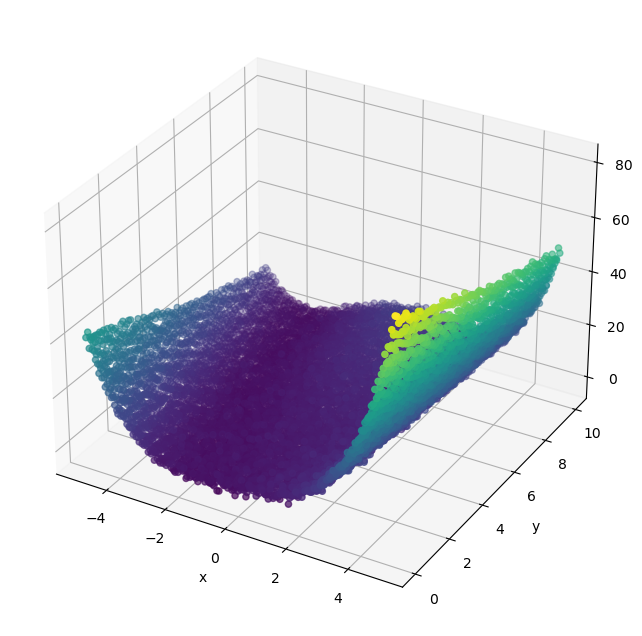

In [3]:
# 3D plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], c=data[:,2], cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Fit non-linear model to data using `curve_fit`

In [4]:
# non-linear model
def model(u, *x):
    return x[0]*exp(x[1]*u[:,0]) + (0.01/x[3])*((x[2] - u[:,0])**2) + x[4]*(u[:,1] - (x[5]*u[:,0])**2)**2

# initial guess
x0 = np.array([1, 0, 1, 1, 0, 1])

# input data
y = data[:,2]
u = data[:,0:2]

# fit model
popt, pcov = curve_fit(model, u, y, p0=x0)

# print results
print('x0 =', x0)
print('x =', popt)

# loss
loss = np.mean((y - model(u, *popt))**2)
print('loss =', loss)

x0 = [1 0 1 1 0 1]
x = [ 2.17917938  0.58238595 -2.99451158 -0.26798183  0.09942884  0.90354721]
loss = 1.0053775425814875


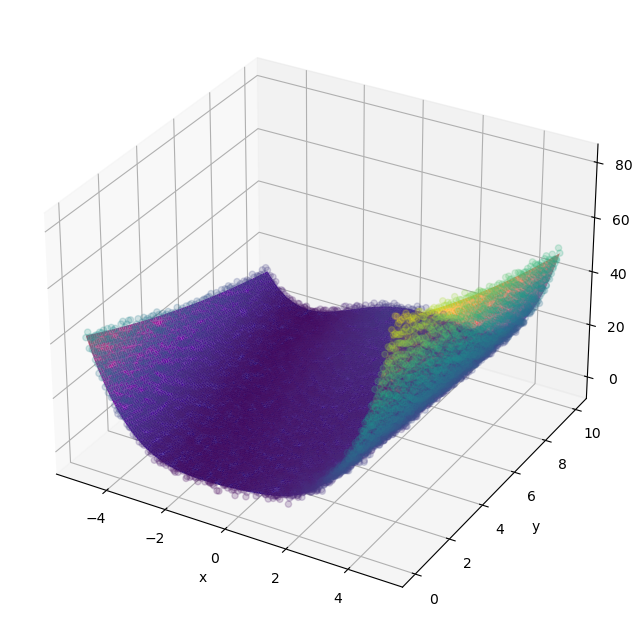

In [5]:
# plot
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], c=data[:,2], cmap='viridis', alpha=0.2)
ax.plot_trisurf(data[:,0], data[:,1], model(u, *popt), cmap='plasma', alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Fit non-linear model to data using `scipy.optimize.minimize`

In [6]:
# minimize
from scipy.optimize import minimize

# objective function
def objective(x):
    return np.mean((y - model(u, *x))**2)

# define bounds
bnds = ((-np.inf, np.inf), (-np.inf, np.inf), (-np.inf, np.inf), (-np.inf, np.inf), (-np.inf, np.inf), (-np.inf, np.inf))

# minimize
res = minimize(objective, x0, method='SLSQP', bounds=bnds)

# print results
print('x0 =', x0)
print('x =', res.x)

# loss
loss = np.mean((y - model(u, *res.x))**2)
print('loss =', loss)

x0 = [1 0 1 1 0 1]
x = [1.76466673 0.61433037 8.28069021 9.53413441 0.09978304 0.90075089]
loss = 1.0045316090547092


C:\Users\lange\AppData\Local\Temp\ipykernel_34996\1676456816.py:3: RuntimeWarning: overflow encountered in exp
  return x[0]*exp(x[1]*u[:,0]) + (0.01/x[3])*((x[2] - u[:,0])**2) + x[4]*(u[:,1] - (x[5]*u[:,0])**2)**2
C:\Users\lange\AppData\Local\Temp\ipykernel_34996\2337216177.py:6: RuntimeWarning: overflow encountered in square
  return np.mean((y - model(u, *x))**2)
C:\Users\lange\AppData\Local\Temp\ipykernel_34996\1676456816.py:3: RuntimeWarning: overflow encountered in multiply
  return x[0]*exp(x[1]*u[:,0]) + (0.01/x[3])*((x[2] - u[:,0])**2) + x[4]*(u[:,1] - (x[5]*u[:,0])**2)**2


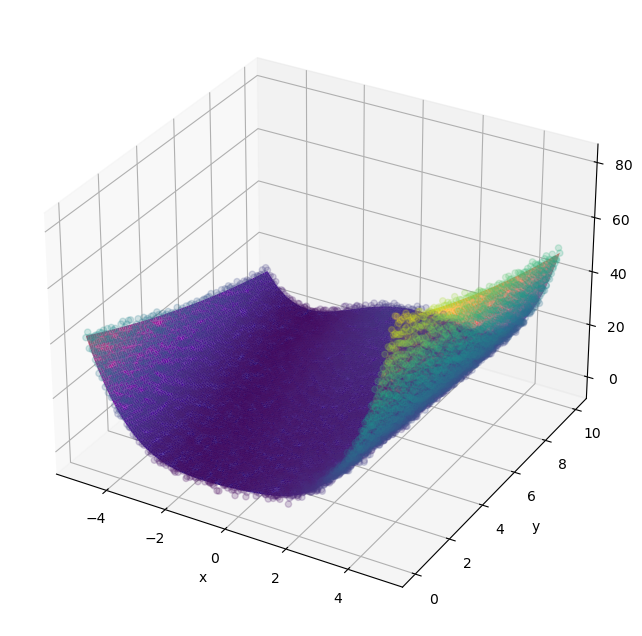

In [7]:
# plot
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], c=data[:,2], cmap='viridis', alpha=0.2)
ax.plot_trisurf(data[:,0], data[:,1], model(u, *res.x), cmap='plasma', alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Plot y_hat vs y

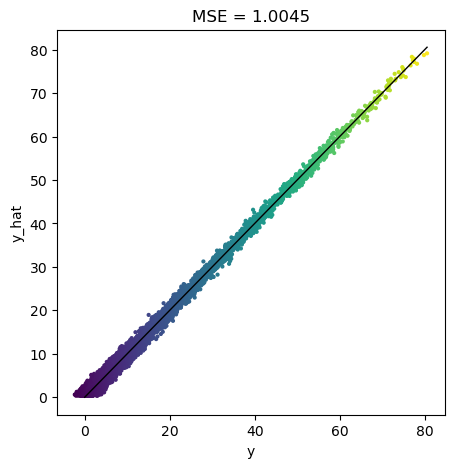

In [8]:
y_hat = model(u, *res.x)
plt.figure(figsize=(5,5))
plt.scatter(y, y_hat, c=y, cmap='viridis', s=4)
plt.plot([0, max(y)], [0, max(y)], color='black', linewidth=1)
plt.xlabel('y')
plt.ylabel('y_hat')
mse = np.round(np.mean((y - y_hat)**2), 4)
plt.title('MSE = ' + str(mse))
plt.show()

Distribution of residuals (normality of residuals implies that the model is a good fit, errors are random and not systematic)

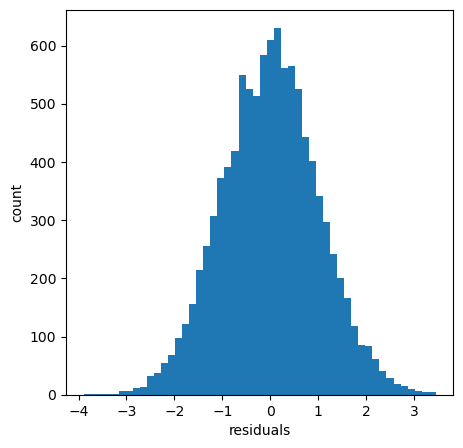

In [9]:
residuals = y - y_hat
plt.figure(figsize=(5,5))
plt.hist(residuals, bins=50)
plt.xlabel('residuals')
plt.ylabel('count')
plt.show()

### Problem 2

Load data

Data was converted in matlab to a suitable format because the provided format could not be read, using this code:

```matlab
%% Load Data
load('DynSysData.mat')
u = out.simout.Data(:,1); % Input data
y = out.simout.Data(:,2); % Output data

% save as 
save("ass6_prob2","u","y")
```

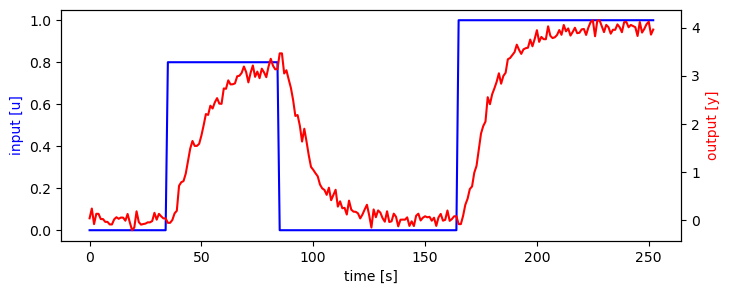

In [10]:
# load data
data = scipy.io.loadmat('ass6_prob2.mat')

# output data
y = data['y'].flatten()
# y = np.arange(0, 10, 1).reshape(-1,1).flatten()

# input data
u = data['u'].flatten()
# u = np.arange(0, 10, 1).reshape(-1,1).flatten()

# one plot with 2 axis
fig, ax1 = plt.subplots(figsize=(8,3))
ax1.plot(u, color='blue')
ax1.set_xlabel('time [s]')
ax1.set_ylabel('input [u]', color='blue')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(y, color='red')
ax2.set_ylabel('output [y]', color='red')
ax2.tick_params(axis='y')

plt.show()

Build model

In [11]:
# parameters
n = 1  # number of AR inputs
m = 1  # number of MA inputs

# output vector Y
Y = y[max(n,m):][np.newaxis].T

# input matrix U
U = np.zeros((len(u) - max(n,m), n+m))

# MA part
for i in range(m):
    U[:,i] = u[max(n,m)-i-1:len(u)-i-1]

# AR part
for i in range(n):
    U[:,m+i] = y[max(n,m)-i-1:len(y)-i-1]

Solve

x* = [0.26012646 0.93603051]


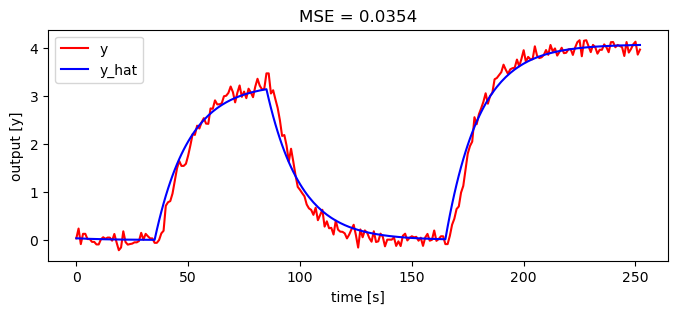

In [12]:
# least squares using pseudo-inverse
# x = (U.T @ U)^-1 @ U^T @ Y where (U.T @ U)^-1 @ U^T = pinv(U) is the pseudo-inverse of U
U_inv = np.linalg.pinv(U)
x = U_inv @ Y
print('x* =', x.flatten())

# predict using model
# note that recursive y is now the model output, not the measured output!!!
y_model = np.zeros(len(y))
y_model[0] = y[0]
for i in range(1, len(y)):
    for j in range(n):
        y_model[i] += x[j+m]*y_model[i-j-1]
    for k in range(m):
        y_model[i] += x[k]*u[i-k-1]

# plot
plt.figure(figsize=(8,3))
plt.plot(y, color='red')
plt.plot(y_model, color='blue')
plt.xlabel('time [s]')
plt.ylabel('output [y]')
plt.legend(['y', 'y_hat'])
plt.title(f'MSE = {np.round(np.mean((y - y_model)**2), 4)}')
plt.show()